In [74]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [75]:
def get_lane_data(file_path):
    
    tree = ET.parse(file_path)
    root = tree.getroot()

    
    timesteps = []
    lane_ids = []
    queueing_times = []
    queueing_lengths = []
    queueing_lengths_experimental = []

    
    for data in root.findall('data'):
        timestep = float(data.attrib['timestep'])
        
        
        for lane in data.findall('lanes/lane'):
            lane_id = lane.attrib['id']
            queueing_time = float(lane.attrib['queueing_time'])
            queueing_length = float(lane.attrib['queueing_length'])
            queueing_length_experimental = float(lane.attrib['queueing_length_experimental'])
            
            timesteps.append(timestep)
            lane_ids.append(lane_id)
            queueing_times.append(queueing_time)
            queueing_lengths.append(queueing_length)
            queueing_lengths_experimental.append(queueing_length_experimental)

    
    df = pd.DataFrame({
        'Timestep': timesteps,
        'Lane ID': lane_ids,
        'Queueing Time': queueing_times,
        'Queueing Length': queueing_lengths,
        'Queueing Length Experimental': queueing_lengths_experimental
    })

    return df

In [76]:

df_before = get_lane_data("C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\ITSC\\sc2\\q\\queue_before.xml")
df_after = get_lane_data("C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\ITSC\\sc2\\q\\queue_after.xml")


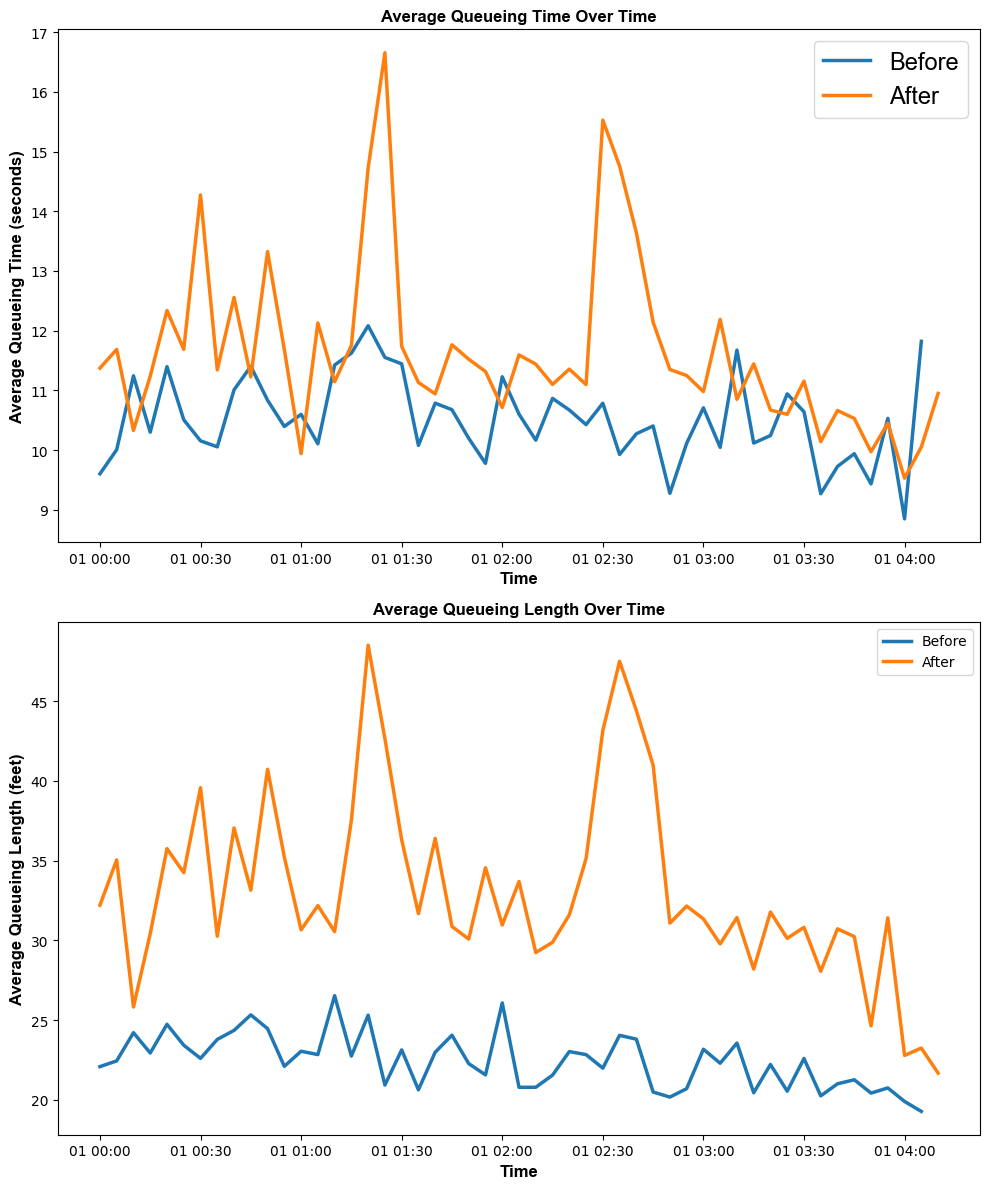

In [85]:

df_before = get_lane_data("C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\ITSC\\sc2\\q\\queue_before.xml")
df_after = get_lane_data("C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\ITSC\\sc2\\q\\queue_after.xml")


df_before = df_before.sort_values('Queueing Time')
df_after = df_after.sort_values('Queueing Time')

# Set the "Timestep" column as the index
df_before['Timestep'] = pd.to_datetime(df_before['Timestep'], unit='s')
df_before.set_index('Timestep', inplace=True)
df_after['Timestep'] = pd.to_datetime(df_after['Timestep'], unit='s')
df_after.set_index('Timestep', inplace=True)

# Convert queueing length from meters to feet
df_before['Queueing Length (feet)'] = df_before['Queueing Length'] * 3.28084
df_before['Queueing Length Experimental (feet)'] = df_before['Queueing Length Experimental'] * 3.28084
df_after['Queueing Length (feet)'] = df_after['Queueing Length'] * 3.28084
df_after['Queueing Length Experimental (feet)'] = df_after['Queueing Length Experimental'] * 3.28084

# Resample the data to 5-minute intervals and calculate the average queueing time and length
df_before_resampled = df_before.resample('5min').agg({'Queueing Time': 'mean', 'Queueing Length (feet)': 'mean', 'Queueing Length Experimental (feet)': 'mean'})
df_after_resampled = df_after.resample('5min').agg({'Queueing Time': 'mean', 'Queueing Length (feet)': 'mean', 'Queueing Length Experimental (feet)': 'mean'})

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Set the font properties for axis labels and tick labels
label_font = {'family': 'Arial', 'size': 12, 'weight': 'bold'}
tick_font = {'family': 'Arial', 'size': 10}

# Plot the average queueing time over time for both "before" and "after" DataFrames
ax1.plot(df_before_resampled.index, df_before_resampled['Queueing Time'], label='Before', linewidth=2.5)
ax1.plot(df_after_resampled.index, df_after_resampled['Queueing Time'], label='After', linewidth=2.5)
ax1.set_xlabel('Time', fontdict=label_font)
ax1.set_ylabel('Average Queueing Time (seconds)', fontdict=label_font)
ax1.set_title('Average Queueing Time Over Time', fontdict=label_font)
ax1.legend(prop={'family': 'Arial', 'size': 17})
ax1.tick_params(axis='both', which='major', labelsize=tick_font['size'])

# Plot the average queueing length (in feet) over time for both "before" and "after" DataFrames
ax2.plot(df_before_resampled.index, df_before_resampled['Queueing Length (feet)'], label='Before', linewidth=2.5)
ax2.plot(df_after_resampled.index, df_after_resampled['Queueing Length (feet)'], label='After', linewidth=2.5)
ax2.set_xlabel('Time', fontdict=label_font)
ax2.set_ylabel('Average Queueing Length (feet)', fontdict=label_font)
ax2.set_title('Average Queueing Length Over Time', fontdict=label_font)
ax2.legend(prop={'family': 'Arial', 'size': 18})
ax2.tick_params(axis='both', which='major', labelsize=tick_font['size'])
ax2.legend()

plt.tight_layout()
plt.show()



In [79]:
df_after["Queueing Time"].mean()

11.824202397358226

In [80]:
df_before["Queueing Time"].mean()

10.546113119834711

# edge data

In [ ]:
df_edge_before = get_lane_data("C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\ITSC\\sc2\\travel time\\before_edge_data.xml")
df_edge_after = get_lane_data("C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\ITSC\\sc2\\travel time\\after_edge_data.xml")

In [37]:
import xml.etree.ElementTree as ET
import pandas as pd

def get_lane_data(file_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Initialize lists to store the data
    interval_begins = []
    interval_ends = []
    edge_ids = []
    travel_times = []
    overlap_travel_times = []
    densities = []
    lane_densities = []
    occupancies = []
    waiting_times = []
    time_losses = []
    speeds = []
    relative_speeds = []

    # Iterate over the 'interval' elements
    for interval in root.findall('interval'):
        interval_begin = float(interval.get('begin', 0))
        interval_end = float(interval.get('end', 0))

        # Iterate over the 'edge' elements within each 'interval'
        for edge in interval.findall('edge'):
            interval_begins.append(interval_begin)
            interval_ends.append(interval_end)
            edge_ids.append(edge.get('id'))
            travel_times.append(float(edge.get('traveltime', 0)))
            overlap_travel_times.append(float(edge.get('overlapTraveltime', 0)))
            densities.append(float(edge.get('density', 0)))
            lane_densities.append(float(edge.get('laneDensity', 0)))
            occupancies.append(float(edge.get('occupancy', 0)))
            waiting_times.append(float(edge.get('waitingTime', 0)))
            time_losses.append(float(edge.get('timeLoss', 0)))
            speeds.append(float(edge.get('speed', 0)))
            relative_speeds.append(float(edge.get('speedRelative', 0)))

    # Create a DataFrame from the extracted data
    df = pd.DataFrame({
        'Interval Begin': interval_begins,
        'Interval End': interval_ends,
        'Edge ID': edge_ids,
        'Travel Time': travel_times,
        'Overlap Travel Time': overlap_travel_times,
        'Density': densities,
        'Lane Density': lane_densities,
        'Occupancy': occupancies,
        'Waiting Time': waiting_times,
        'Time Loss': time_losses,
        'Speed': speeds,
        'Relative Speed': relative_speeds
    })

    return df

# Read the "before" XML file and create a DataFrame
df_edge_before = get_lane_data("C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\ITSC\\sc2\\travel time\\before_edge_data.xml")

# Read the "after" XML file and create a DataFrame
df_edge_after = get_lane_data("C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\ITSC\\sc2\\travel time\\after_edge_data.xml")



In [34]:
df_edge_before[]

,Interval Begin,Interval End,Edge ID,Travel Time,Overlap Travel Time,Density,Lane Density,Occupancy,Waiting Time,Time Loss,Speed,Relative Speed
0,0.0,300.0,-1656,6.30,6.66,1.75,0.88,0.42,0.0,4.76,13.93,0.66
1,0.0,300.0,-2239,27.48,28.15,32.10,10.70,5.29,416.0,629.76,3.07,0.17
2,0.0,300.0,-9039,12.29,12.64,1.47,0.49,0.24,0.0,6.78,13.89,1.55
3,0.0,300.0,-9040,8.40,9.04,21.07,10.53,4.97,70.0,196.57,6.41,0.46
4,0.0,300.0,-9045,10.16,11.18,20.10,10.05,4.68,53.0,246.81,7.89,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...
1174,14700.0,15000.0,9040,24.51,24.99,24.76,8.25,4.03,258.0,330.71,2.29,0.16
1175,14700.0,15000.0,9045,7.88,8.35,5.80,2.90,1.38,10.0,46.38,10.56,0.75
1176,14700.0,15000.0,9052,6.53,7.08,13.10,6.55,3.05,31.0,84.11,5.28,0.38
1177,14700.0,15000.0,9069,8.57,8.94,4.50,2.25,1.08,0.0,16.91,13.90,0.99


In [53]:
df_edge_before["Lane Density"].mean()

5.601212892281595

In [54]:
df_edge_after["Lane Density"].mean()

7.59929173693086

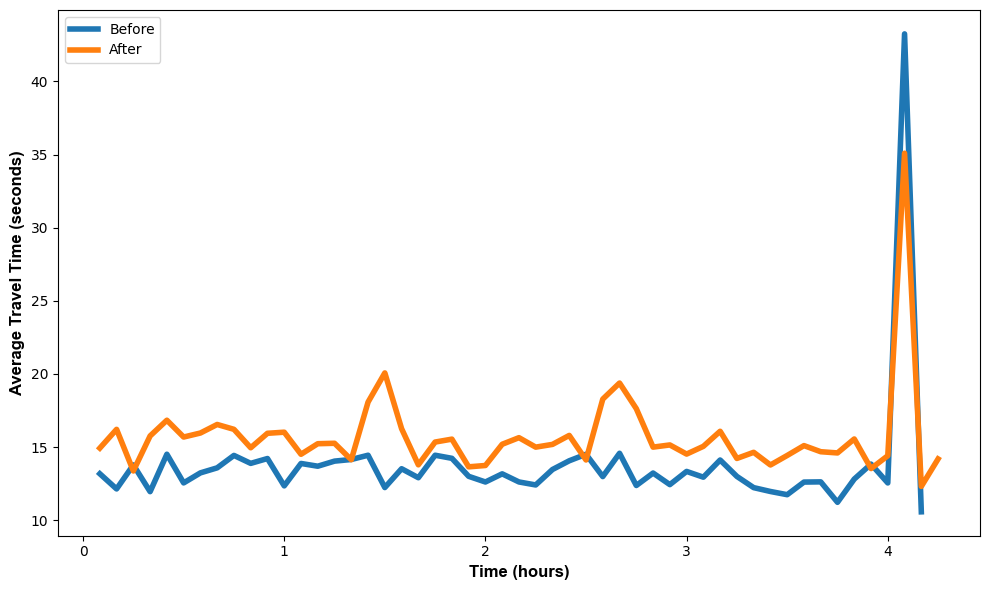

In [91]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

def get_lane_data(file_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Initialize lists to store the data
    interval_begins = []
    interval_ends = []
    edge_ids = []
    travel_times = []
    overlap_travel_times = []
    densities = []
    lane_densities = []
    occupancies = []
    waiting_times = []
    time_losses = []
    speeds = []
    relative_speeds = []

    # Iterate over the 'interval' elements
    for interval in root.findall('interval'):
        interval_begin = float(interval.get('begin', 0))
        interval_end = float(interval.get('end', 0))

        # Iterate over the 'edge' elements within each 'interval'
        for edge in interval.findall('edge'):
            interval_begins.append(interval_begin)
            interval_ends.append(interval_end)
            edge_ids.append(edge.get('id'))
            travel_times.append(float(edge.get('traveltime', 0)))
            overlap_travel_times.append(float(edge.get('overlapTraveltime', 0)))
            densities.append(float(edge.get('density', 0)))
            lane_densities.append(float(edge.get('laneDensity', 0)))
            occupancies.append(float(edge.get('occupancy', 0)))
            waiting_times.append(float(edge.get('waitingTime', 0)))
            time_losses.append(float(edge.get('timeLoss', 0)))
            speeds.append(float(edge.get('speed', 0)))
            relative_speeds.append(float(edge.get('speedRelative', 0)))

    # Create a DataFrame from the extracted data
    df = pd.DataFrame({
        'Interval Begin': interval_begins,
        'Interval End': interval_ends,
        'Edge ID': edge_ids,
        'Travel Time': travel_times,
        'Overlap Travel Time': overlap_travel_times,
        'Density': densities,
        'Lane Density': lane_densities,
        'Occupancy': occupancies,
        'Waiting Time': waiting_times,
        'Time Loss': time_losses,
        'Speed': speeds,
        'Relative Speed': relative_speeds
    })

    return df

# Read the "before" XML file and create a DataFrame
df_edge_before = get_lane_data("C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\ITSC\\sc2\\travel time\\before_edge_data.xml")

# Read the "after" XML file and create a DataFrame
df_edge_after = get_lane_data("C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\ITSC\\sc2\\travel time\\after_edge_data.xml")

# Sort the DataFrames by 'Interval End' time
df_edge_before = df_edge_before.sort_values('Interval End')
df_edge_after = df_edge_after.sort_values('Interval End')

# Convert 'Interval End' time from seconds to hours
df_edge_before['Interval End (hours)'] = df_edge_before['Interval End'] / 3600
df_edge_after['Interval End (hours)'] = df_edge_after['Interval End'] / 3600

# Group by 'Interval End (hours)' and calculate the average 'Travel Time'
df_before_avg = df_edge_before.groupby('Interval End (hours)')['Travel Time'].mean()
df_after_avg = df_edge_after.groupby('Interval End (hours)')['Travel Time'].mean()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the average 'Travel Time' for both "before" and "after" DataFrames
ax.plot(df_before_avg.index, df_before_avg.values,  label='Before', linewidth=4)
ax.plot(df_after_avg.index, df_after_avg.values, label='After', linewidth=4)

# Set labels and titlelabel='After', linewidth=2.5
ax.set_xlabel('Time (hours)',fontdict=label_font)
ax.set_ylabel('Average Travel Time (seconds)',fontdict=label_font)
ax.legend(prop={'family': 'Arial', 'size': 20})
ax.tick_params(axis='both', which='major', labelsize=tick_font['size'])


#ax.set_title('Average Travel Time vs. Interval End Time')

# Add legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()